In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

# Roulette wheel selection
how to select an element of a vector each element having a different fitness value

In [2]:
# a vector of fitness values (in our cases the degrees)
k=[5,7,3,1,9,20,0,3,1]

In [3]:
# 1) create the normalized vector
sumK=sum(k)
normK=[i/sumK for i in k]

print (normK)

[0.10204081632653061, 0.14285714285714285, 0.061224489795918366, 0.02040816326530612, 0.1836734693877551, 0.40816326530612246, 0.0, 0.061224489795918366, 0.02040816326530612]


In [9]:
# 2) select an element according to the probabilities values in normK
np.random.choice(len(normK), p=normK)

1

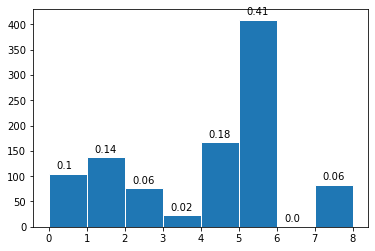

In [10]:
ll=[np.random.choice(len(normK), p=normK) for i in range(1000)]
plt.hist(ll, bins=range(len(k)),edgecolor='white')

yy,xx=np.histogram(ll, bins=range(len(k)))
xx=range(len(k)-1)
for (u,v,t) in zip(xx,yy,normK):
    plt.text(u+0.2,v+10,round(t, 2))
plt.show()



In [11]:
def roulette_wheel_selection(vecFit,m):
    #make a deep copy of the input vector
    v=[i for i in vecFit]
    #calculate the normalized vector
    fitNorm=[i/float(sum(v)) for i in v]
    ll=[]
    for i in range(m):
        ch=np.random.choice(len(fitNorm), p=fitNorm)
        ll.append(ch)
        v[ch]=0
        fitNorm=[i/float(sum(v)) for i in v]
    return(ll)

In [13]:
roulette_wheel_selection(k,4)

[5, 7, 1, 0]

# MANUAL GENERATION

In [14]:
#parameters
Nini=5
Nmax=1000
m=3

In [15]:
#initialization
G=nx.complete_graph(Nini)
#node attachment loop:
for t in range(Nini+1,Nmax):
    listNodes=list(G.nodes())
    listk=[G.degree(n) for n in G.nodes()]
    #select new edges
    newTargets=roulette_wheel_selection(listk,3)
    newEdges=[(t,i) for i in newTargets]
    G.add_edges_from(newEdges)

In [16]:
k=[G.degree(n) for n in G.nodes()]

In [17]:
def logBinning(degreeList,nbin):
    kmin=min(degreeList)
    kmax=max(degreeList)
    logBins = np.logspace(np.log10(kmin), np.log10(kmax),num=nbin)
    logBinDensity, binedges = np.histogram(degreeList, bins=logBins, density=True)
    logBins = np.delete(logBins, -1)
    return logBinDensity, logBins

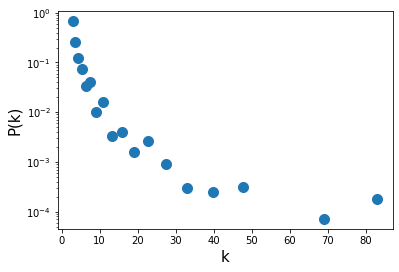

In [18]:
y,x=logBinning(np.array(k),20)
plt.semilogy(x,y,'o',markersize=10)
plt.xlabel('k',size=15)
plt.ylabel('P(k)',size=15)
plt.show()

<ipython-input-20-2f0c11ecc157>:5: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1000)


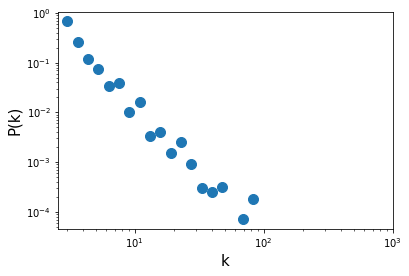

In [20]:
y,x=logBinning(np.array(k),20)
plt.loglog(x,y,'o',markersize=10)
plt.xlabel('k',size=15)
plt.ylabel('P(k)',size=15)
plt.xlim(0,1000)
plt.show()

#### IT IS A POWER LAW!

# NETWROKX BA GRAPH GENERATOR

In [21]:
# To generate a BA graph with 1000 nodes adding 3 new links at each iteration:
G=nx.barabasi_albert_graph(10000,3)

In [22]:
# calculate the exponent of the powerlaw
from scipy.optimize import curve_fit

def power_law (x, m, c):
    return x**m * c



In [23]:
k=[G.degree(n) for n in G.nodes()]
y,x=logBinning(np.array(k),20)


In [25]:
popt, pcov = curve_fit(power_law, x, y)
print (popt)

[-3.24393329 17.23924728]


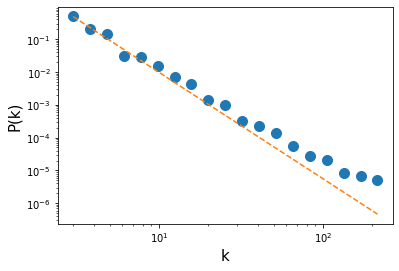

In [26]:
plt.loglog(x,y,'o',markersize=10)
plt.loglog(x, power_law(x, *popt), '--')
plt.xlabel('k',size=15)
plt.ylabel('P(k)',size=15)
#plt.xlim(2,200)
plt.show()

# PROPERTIES OF BARABASI ALBERT NETWORKS 

In [27]:
#parameters
NList=[100,500,1000,2500,5000,10000]

GList=[]
for N in NList:
    G=nx.barabasi_albert_graph(N,3)
    GList.append(G)

In [28]:
#average degree
for G in GList:
    k=np.mean(list(dict(G.degree()).values()))
    print (k)

5.82
5.964
5.982
5.9928
5.9964
5.9982


In [29]:
#average clustering coefficient
clust=[]
for G in GList:
    cl=nx.average_clustering(G)
    clust.append(cl)

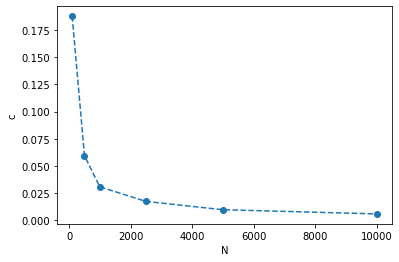

In [30]:
plt.plot(NList,clust,'o--')
plt.xlabel('N')
plt.ylabel('c')
plt.show()

In [31]:
#average shortest path length

#parameters
NList=[100,200,500,800,1000,1500]

GList=[]
for N in NList:
    G=nx.barabasi_albert_graph(N,3)
    GList.append(G)

avSp=[]
for G in GList:
    sp=nx.average_shortest_path_length(G)
    avSp.append(sp)

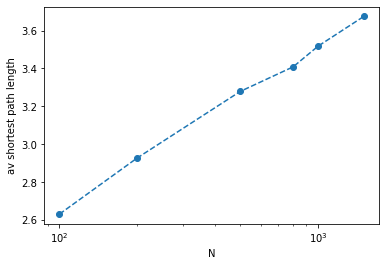

In [33]:
plt.semilogx(NList,avSp,'o--')
plt.xlabel('N')
plt.ylabel('av shortest path length')
plt.show()